In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Задача 1. Выявление аномалий в стоимости автомобиля
# 1. Загрузите датасет из data/vehicles_dataset_upd.csv и выведите первые 5 записей.

In [2]:
df = pd.read_csv('data/vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


# 2.Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — indigo. Не забудьте подписать название графика и оси.

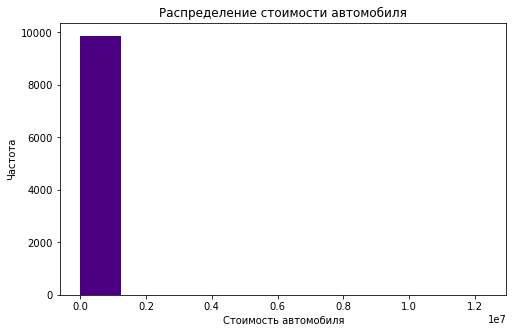

In [3]:
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

# 3.График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов. Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости. Не забудьте подписать название графика и оси.

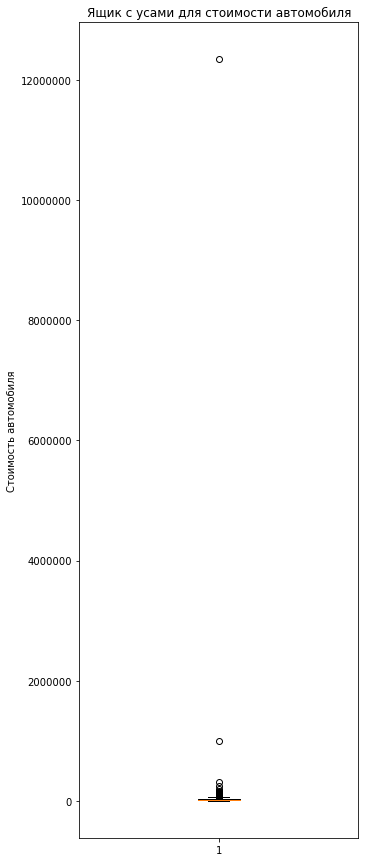

In [4]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Ящик с усами для стоимости автомобиля')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# 4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна. Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью apply(lambda x: f"{x:0.3f}") отобразите значения в удобном для восприятия виде.

In [5]:
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

# 5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [6]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [7]:
boundaries = calculate_outliers(df.price)
boundaries

(-22485.0, 58275.0)

min 500.000 значение (price) входит в интервал между полученными границами, max 12345678.000 значение (price) не входит в интервал между полученными границами.

# 6.Посчитайте и выведете количество выбросов в стоимости автомобиля.

In [8]:
is_outlier = (df.price < boundaries[0]) | (df.price > boundaries[1])
is_outlier

0       False
1       False
2       False
3       False
4       False
        ...  
9863    False
9864    False
9865    False
9866    False
9867    False
Name: price, Length: 9868, dtype: bool

In [9]:
is_outlier.sum()

207

# 7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [10]:
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1995,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09T19:46:04-0700,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1995,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23T10:43:27-0700,high,2021-04-23 17:43:27+00:00
142,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12T10:34:12-0500,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00
9823,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01T13:40:57-0700,high,2021-05-01 20:40:57+00:00
9839,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29T10:03:19-0700,high,2021-04-29 17:03:19+00:00
9846,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15T11:05:47-0400,high,2021-04-15 15:05:47+00:00


Могут описать данные. Данные автомобили, практически все не старые, крутые и мощные(если посмотреть описание) в результате они дорогие и попадают в high ценовую категорию.

# 8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [11]:
df[is_outlier].tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
9329,7316955095,https://houston.craigslist.org/ctd/d/tampa-200...,houston,https://houston.craigslist.org,59000,2005,other,International 4300,diesel,107231,clean,automatic,https://images.craigslist.org/00t0t_2BaCIs4JgI...,2005 INTERNATIONAL 4300 GRAPPLE TRUCK FORMER...,tx,28.009100,-82.503400,2021-05-04T16:26:33-0500,high,2021-05-04 21:26:33+00:00
9340,7308346941,https://eastoregon.craigslist.org/ctd/d/pasco-...,east oregon,https://eastoregon.craigslist.org,79999,2019,ram,diesel cummins 3500,diesel,5104,clean,automatic,https://images.craigslist.org/01010_cy33USrT5r...,2019 Dodge Ram 3500 Laramie Sport 4x4 **Clean ...,or,46.234838,-119.128015,2021-04-17T10:43:55-0700,high,2021-04-17 17:43:55+00:00
9371,7315548747,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,77995,2019,chevrolet,silverado hd,diesel,16521,clean,automatic,https://images.craigslist.org/00202_kCE3Zpl8K0...,2019 Chevrolet Chevy Silverado 3500HD High Cou...,ca,34.107220,-117.455310,2021-05-01T15:41:06-0700,high,2021-05-01 22:41:06+00:00
9453,7305167901,https://butte.craigslist.org/ctd/d/boise-2019-...,butte,https://butte.craigslist.org,61999,2019,ram,cummins 3500 bighorn,diesel,24346,clean,automatic,https://images.craigslist.org/00m0m_8Ax8BIDu4Y...,2019 Dodge Ram 3500 Bighorn 4x4 **Clean Carfax...,mt,43.619740,-116.294690,2021-04-11T09:46:12-0600,high,2021-04-11 15:46:12+00:00
9516,7314841234,https://sarasota.craigslist.org/ctd/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,66900,2021,honda,odyssey exl,gas,13,clean,automatic,https://images.craigslist.org/00808_hL2XdSEm18...,2021 Honda Odyssey *Wheelchair Van* *Handicap ...,fl,27.270402,-82.530222,2021-04-30T12:00:49-0400,high,2021-04-30 16:00:49+00:00
9637,7314630857,https://topeka.craigslist.org/ctd/d/lawrence-l...,topeka,https://topeka.craigslist.org,76128,2020,bmw,m4,gas,4013,clean,automatic,https://images.craigslist.org/00s0s_2Mz2Ceuq2V...,➔ Want to see more pictures?Paste this link to...,ks,38.990868,-95.233358,2021-04-29T20:08:33-0500,high,2021-04-30 01:08:33+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00
9679,7316921328,https://portland.craigslist.org/mlt/cto/d/wedd...,portland,https://portland.craigslist.org,79995,2019,ford,f-350 super duty,diesel,7995,clean,automatic,https://images.craigslist.org/00L0L_unHFRZq2PK...,2019 F-350 LARIAT ULTIMATE/SPORT PKG 4X4 6.7 P...,or,42.407300,-124.421800,2021-05-04T13:25:00-0700,high,2021-05-04 20:25:00+00:00
9682,7312788253,https://nh.craigslist.org/ctd/d/methuen-2004-r...,new hampshire,https://nh.craigslist.org,109995,2004,other,ROLLS ROYCE PHANTOM,gas,26000,clean,automatic,https://images.craigslist.org/00a0a_aF4tYDmAxB...,2004 Rolls-Royce Phantom Base 4dr Sedan Of...,nh,42.756205,-71.210258,2021-04-26T10:43:42-0400,high,2021-04-26 14:43:42+00:00
9683,7316583261,https://dallas.craigslist.org/dal/cto/d/rockwa...,dallas / fort worth,https://dallas.craigslist.org,59000,2004,ford,f650 super excursion,diesel,51000,clean,automatic,https://images.craigslist.org/00202_kboFksPAnp...,Selling This Ford F650 SUPER EXCURSION Thes...,tx,32.886000,-96.409500,2021-05-03T22:31:09-0500,high,2021-05-04 03:31:09+00:00


# 9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную df_new, выведете первые 5 значений.

In [12]:
df_new = df.drop(df[is_outlier].index)
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [13]:
df_new[df_new.id == 7305167901] # выборочная проверка удаления выбросов

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


In [14]:
df_new.shape

(9661, 20)

# Задача 2. Исследование зависимости стоимости автомобиля от года производства
# 1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию

In [65]:
stats = df_new.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats = stats.rename(columns={'price': 'price_mean'})
stats

,year,price_mean
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


# 2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

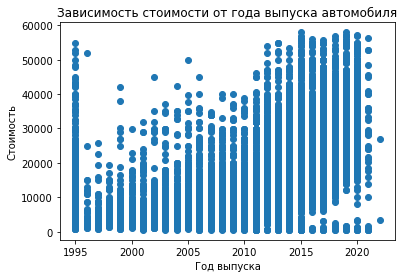

In [16]:
plt.figure()
plt.scatter(df_new['year'], df_new['price'])
plt.title("Зависимость стоимости от года выпуска автомобиля")
plt.xlabel('Год выпуска')
plt.ylabel('Стоимость')

plt.show();

# 3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [58]:
stats_2 = df_new.groupby(['year'], as_index=False)[['id']].count()
stats_2 = stats_2.rename(columns={'id': 'count_avto'})
stats_2

,year,count_avto
0,1995,419
1,1996,25
2,1997,44
3,1998,55
4,1999,81
5,2000,78
6,2001,122
7,2002,149
8,2003,185
9,2004,208


# 4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [18]:
df_clear = df_new.drop(df_new[df_new.year == 2022].index)
df_clear.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [19]:
df_clear.year.describe()

count    9659.000000
mean     2011.594989
std         6.401374
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2021.000000
Name: year, dtype: float64

# 5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию

In [61]:
stats_3 = df_clear.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats_3 = stats_3.rename(columns={'price': 'price_mean'})
stats_3

,year,price_mean
0,1995,13219.472554
1,1996,9362.960000
2,1997,6441.250000
3,1998,6528.672727
4,1999,7446.641975
5,2000,7614.410256
6,2001,7852.090164
7,2002,7173.798658
8,2003,7767.962162
9,2004,7684.105769


# 6. Постройте линейный график (plot) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии — blue, символ маркировки точек (marker) — ромб/алмаз — D, цвет точек (markerfacecolor) — orange. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании. Не забудьте подписать название графика и оси.

Text(0, 0.5, 'Средняя стоимость автомобиля')

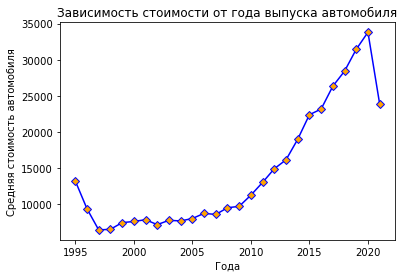

In [63]:
plt.figure()
plt.plot(stats_3['year'],stats_3['price_mean'], color = 'b', marker = 'D', markerfacecolor = 'orange')
plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.xlabel('Года')
plt.ylabel('Средняя стоимость автомобиля')

# 7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:

In [64]:
df_clear['year'].corr(df_clear['price'])

0.5497418197792339

# 1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
Ваш ответ: связь есть. Чем новее год выпуска любого товара, тем выше его стоимость.

# 2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
Ваш ответ: есть положительная заметная(если исходить из интерпретации силы связи) связь. Коэфициент Пирсона находится в интервале [-1;1]. Здесь чуть больше 0,5.

# 3. Существующая связь является прямой или обратной? Почему?
Ваш ответ: связь называется прямой, так как коэфициент имеет положительный знак.То есть, чем больше один показатель, тем больше и другой.

# 8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

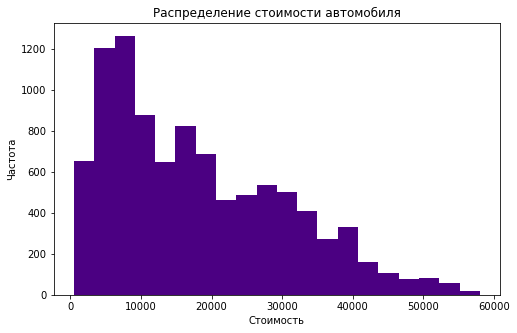

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(df_clear.price, bins=20, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

# 9. Сохраните для дальнейшего использования датафрейм df_new в файл data/vehicles_dataset_upd2.csv, индексы не сохраняйте.

In [24]:
df_new = df_clear.copy()

In [25]:
df_new.to_csv('data\df_new.csv', index = False)

# Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

# 1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории.
# Подумайте, почему полученный график так выглядит?

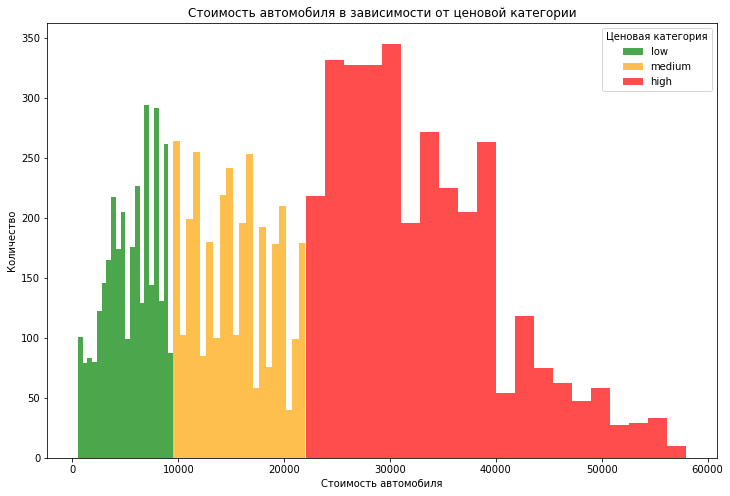

In [26]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.hist(data['price'], bins=20, color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Стоимость автомобиля')
plt.title('Стоимость автомобиля в зависимости от ценовой категории')
plt.legend(colors, title="Ценовая категория");

Слева низкая (зеленая) ценовая категория, в центре средняя (оранжевая) ценовая категория, справа высокая (красная) ценовая категория.

# 2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу.

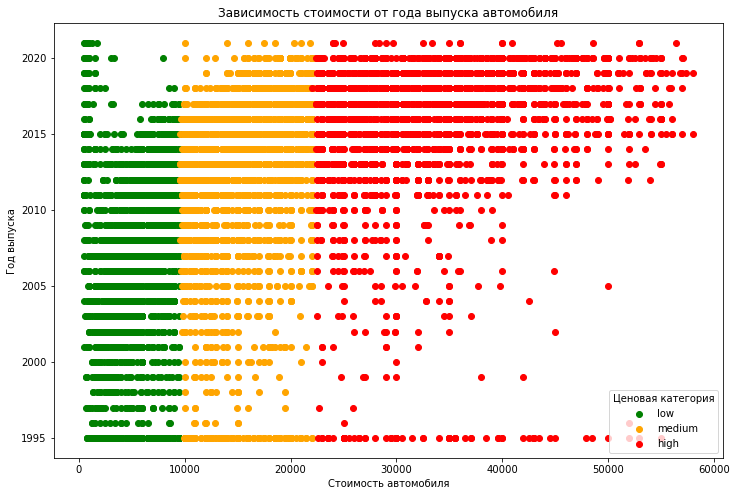

In [27]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category)

ax.legend(loc='lower right', title="Ценовая категория")
plt.title("Зависимость стоимости от года выпуска автомобиля")
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Год выпуска')
plt.show()

# Задача 4. Визуализация категориальных переменных
# 1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [43]:
stats_4 = df_new.groupby(['manufacturer'], as_index=False)[['id']].count()
stats_4 = stats_4.rename(columns={'id': 'count_avto'})
stats_4 

,manufacturer,count_avto
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,145
5,cadillac,179
6,chevrolet,1243
7,chrysler,159
8,datsun,2
9,dodge,321


# 2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (width) — 0.9, цвета — чередующиеся springgreen и dodgerblue. Не забудьте подписать название графика и оси. Для оси OX разверните подписи на 45 градусов, используя метод xticks и его параметр rotation.

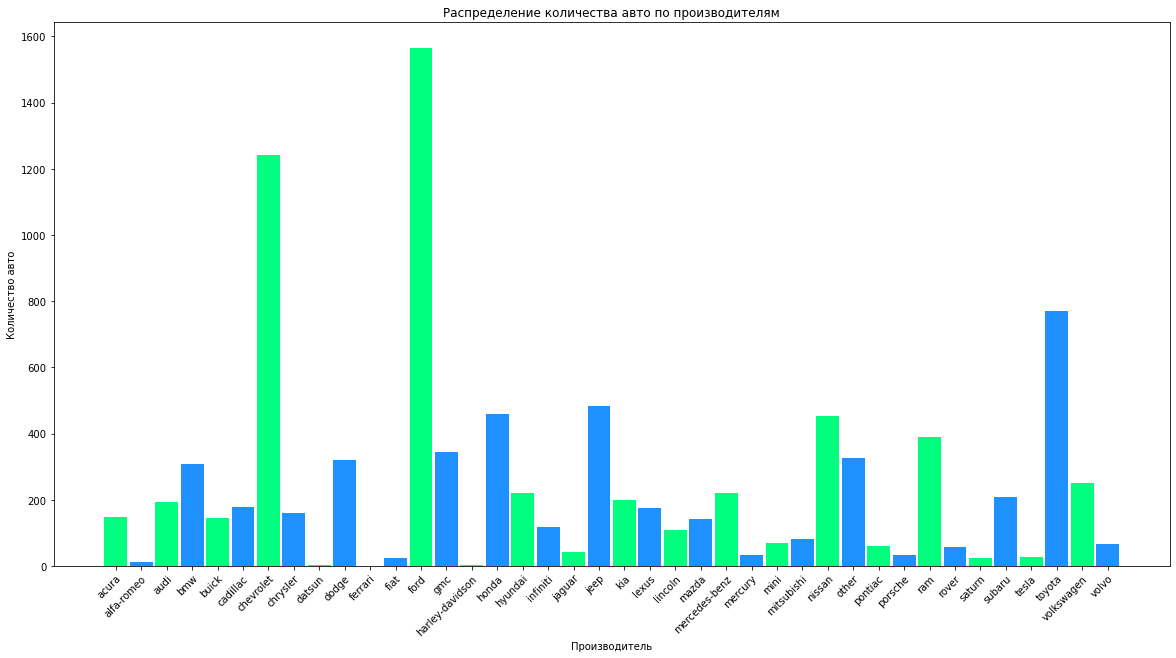

In [49]:
plt.figure(figsize=(20, 10))
plt.bar(stats_4['manufacturer'], stats_4['count_avto'], color = ['springgreen','dodgerblue'], width = 0.9)
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.xlabel('Производитель')
plt.ylabel('Количество авто')
plt.title('Распределение количества авто по производителям');

# 3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [50]:
stats_5 = df_new.groupby(['transmission'], as_index=False)[['id']].count()
stats_5 = stats_5.rename(columns={'id': 'count_avto'})
stats_5

,transmission,count_avto
0,automatic,7398
1,manual,612
2,other,1649


# 4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.

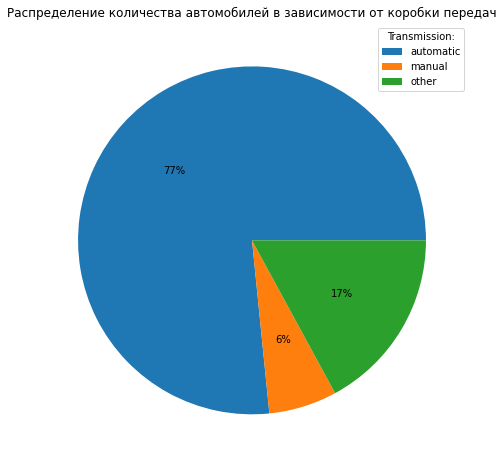

In [52]:
plt.figure(figsize=(12, 8))
plt.pie(stats_5['count_avto'], labels = stats_5['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение количества автомобилей в зависимости от коробки передач")
plt.legend(title = "Transmission:")
plt.show();